<a href="https://colab.research.google.com/github/svperbeast/ai_lab/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

## FCFS(First Come First Served) Job Scheduling

In [53]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

class Process:
  def __init__(self, sw_type, requested_n_cores, submit_time, burst_time):
    self.sw_type = sw_type
    self.requested_n_cores = requested_n_cores
    self.submit_time = submit_time
    self.burst_time = burst_time
    self.start_time = 0
    self.end_time = 0
    self.wait_time = 0
    self.used_cores = []

  def __str__(self):
    s = ('Process sw_type {} requested_n_cores {}({}) submit_time {} ' +
         'burst_time {} start_time {} end_time {} wait_time {}')
    return s.format(self.sw_type, self.requested_n_cores, self.used_cores,
                    self.submit_time, self.burst_time,
                    self.start_time, self.end_time, self.wait_time)

class FCFS:
  def __init__(self, n_cores):
    self.n_cores = n_cores

  def _get_total_wait_time(self, procs):
    total_wait_time = 0
    for proc in procs:
      total_wait_time += proc.wait_time
    
    return total_wait_time
  
  def _get_gantt_plot(self, procs):
    ytick = 5
    
    fig, gnt = plt.subplots()

    gnt.set_ylim(0, (self.n_cores + 1) * ytick)
    gnt.set_xlabel('milliseconds since start')
    gnt.set_ylabel('cores')


    gnt.set_yticks(list(range(ytick, (self.n_cores * ytick) + ytick, ytick)))
    gnt.set_yticklabels(list(map(str, list(range(1, self.n_cores + 1)))))

    gnt.grid(True)

    for proc in procs:
      start_time = proc.start_time
      duration = proc.burst_time

      for core in proc.used_cores:
        y = ((core + 1) * ytick) - 2
        w = 3
        gnt.broken_barh([(start_time, duration)], (y, w))

    canvas = FigureCanvas(fig)
    canvas.draw()
    image = canvas.buffer_rgba()
    return np.asarray(image)

  def run(self, input_procs):
    """
    returns handled process list, total wait_time and gantt plot (numpy array).
    """
    if len(input_procs) == 0:
      raise Exception('the number of input_procs is 0.')

    procs = copy.copy(input_procs)
    handled_procs = []

    core_status = [0] * self.n_cores
    cur_time = 0
    
    # handle the first process
    proc = procs[0]
    n_cores = proc.requested_n_cores
    if n_cores > self.n_cores:
      ncores = self.n_cores

    proc.end_time = proc.burst_time
    proc.start_time = cur_time
    proc.wait_time = proc.start_time - proc.submit_time

    used_cores = []
    for i in range(len(core_status)):
      if n_cores == 0:
        break

      if core_status[i] <= cur_time:
        core_status[i] += proc.end_time
        used_cores.append(i)
        n_cores -= 1

    proc.used_cores = used_cores

    procs.remove(proc)
    handled_procs.append(proc)

    # handle the rest procsesses
    while len(procs) > 0:
      proc = procs[0]

      n_cores = proc.requested_n_cores
      if n_cores > self.n_cores:
        ncores = self.n_cores
      
      n_avail_cores = []
      for i in range(len(core_status)):
        if core_status[i] <= cur_time:
          n_avail_cores.append(i)
      
      if n_cores <= len(n_avail_cores):
        used_cores = []
        for ci in n_avail_cores:
          if n_cores == 0:
            break

          core_status[ci] += proc.burst_time
          used_cores.append(ci)
          n_cores -= 1

        proc.end_time = cur_time + proc.burst_time
        proc.start_time = cur_time
        proc.wait_time = proc.start_time - proc.submit_time
        proc.used_cores = used_cores

        procs.remove(proc)
        handled_procs.append(proc)
      else:
        cur_time += max(core_status) + 1

    image = self._get_gantt_plot(handled_procs)
    total_wait_time = self._get_total_wait_time(handled_procs)
    return handled_procs, total_wait_time, image

Process sw_type 1 requested_n_cores 1([0]) submit_time 0 burst_time 100 start_time 0 end_time 100 wait_time 0
Process sw_type 1 requested_n_cores 1([1]) submit_time 0 burst_time 100 start_time 0 end_time 100 wait_time 0
Process sw_type 2 requested_n_cores 8([0, 1, 2, 3, 4, 5, 6, 7]) submit_time 1 burst_time 400 start_time 101 end_time 501 wait_time 100
total wait time: 100
(288, 432, 4)


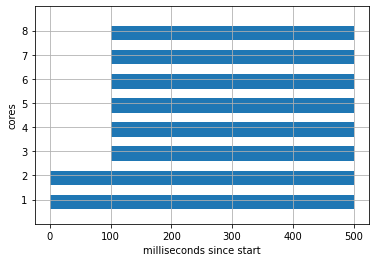

In [62]:
sched = FCFS(8)
procs = []
procs.append(Process(1, 1, 0, 100))
procs.append(Process(1, 1, 0, 100))
procs.append(Process(2, 8, 1, 400))

procs, tot_wt, image = sched.run(procs)
for p in procs:
  print(p)
print('total wait time: {}'.format(tot_wt))
print(image.shape)
#plt.imsave('gantt.png', image)